In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import deepquantum as dq
import torch

# quantum u gate map

 using "mapper" function for map the quantum gate to optical quantum circuit. \
 n_mode: 2*n_qubits + 2 \
 auxiliary modes: [0,0] or [1,0] in the last 2modes \
succcess probability: preferred 1/3 for 2qubtis, 1/4 for 3 qubits 

## map the quantum gate

In [2]:
swap  = np.array([[1,0,0,0],
                  [0,0,1,0],
                 [0,1,0,0],
                 [0,0,0,1]])
iswap  = np.array([[1,0,0,0],
                  [0,0,1j,0],
                 [0,1j,0,0],
                 [0,0,0,1]])
cnot = np.array([[1,0,0,0],
                  [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])

In [3]:
mqc = dq.photonic.mapper

In [5]:
n_qubits = 2
n_mode = 6
ugate = cnot
aux = [0,0]
aux_pos = [4,5]
success = 1/3
umap = mqc.UgateMap(n_qubits=n_qubits, n_mode=n_mode,ugate=ugate,success=success,aux=aux,aux_pos=aux_pos )
basis_ = umap.basis

In [5]:
umap.ugate = cnot
umap.success = 1/3
Re3 = umap.solve_eqs_real( total_trials=1, trials=10,  precision=1e-5) # for real solution

True 4.681003616715461e-10
True 0.34514271358329623ss: 1
True 0.3451323186179851ess: 1
True 7.62488220108372e-10s: 1
True 1.1837710138013715e-09 2
True 0.34513316801390675ss: 3
True 0.3451587833615762ess: 3
True 0.34513255089885075ss: 3
True 5.819172715619122e-09: 3
True 4.188597480175903e-09: 4


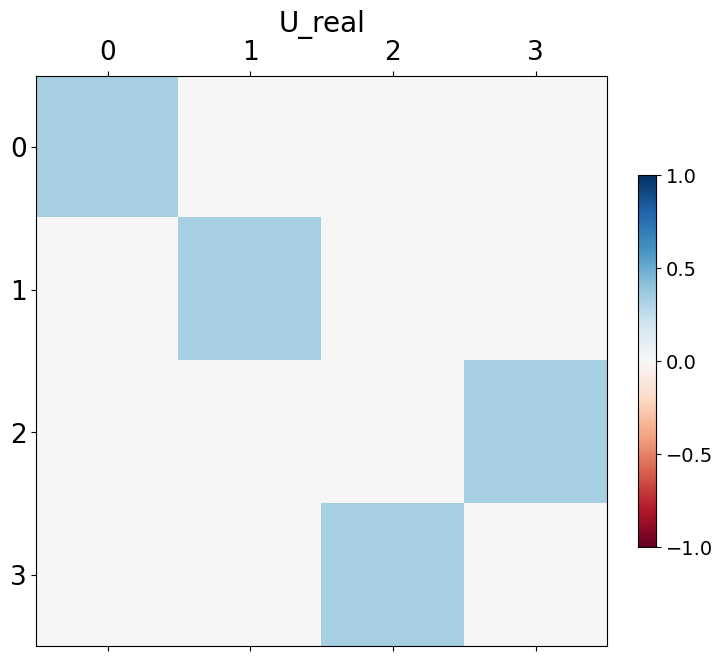

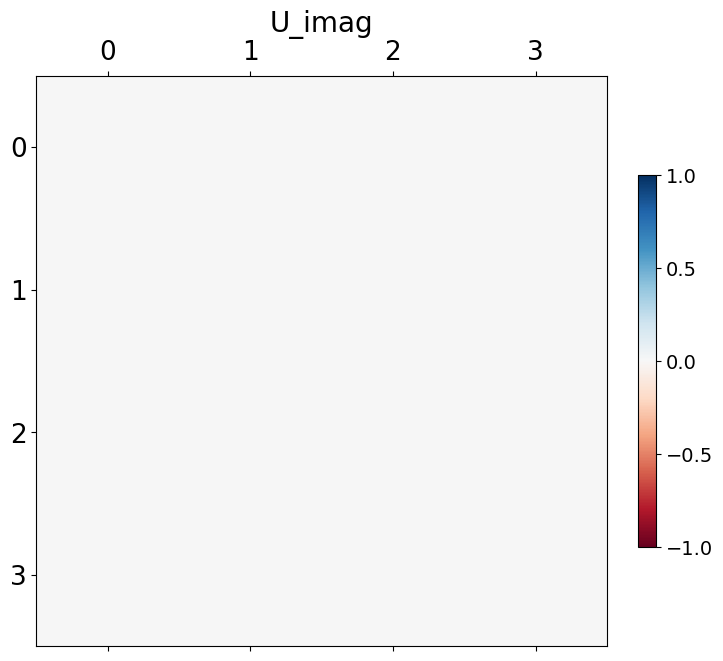

In [17]:
## check result
re = (Re3[0][0][0])
transfer_mat = umap.get_transfer_mat(re)
umap.plot_u(transfer_mat, vmin=-1)
np.save("cnot_test.npy", re) # save the first result

## check using perceval

install using pip install perceval-quandela

In [1]:
import perceval as pcvl
import numpy as np
import perceval.components as comp


In [11]:
basis_ = [[1,0,1,0,0,0],
         [1,0,0,1,0,0],
         [0,1,1,0,0,0],
         [0,1,0,1,0,0]]
cnot_test = np.load("cnot_test.npy")
matrix = pcvl.Matrix(cnot_test)
cnot = comp.Unitary(matrix)
backend = pcvl.BackendFactory().get_backend("Naive")
backend.set_circuit(cnot)
for i in basis_:
    input_state=pcvl.BasicState(i)
    backend.set_input_state(input_state)
    print("input",i, "\noutput",backend.prob_distribution())

input [1, 0, 1, 0, 0, 0] 
output {
  |2,0,0,0,0,0>: 0.22222222227058305
  |1,0,1,0,0,0>: 0.11111111113183722
  |1,0,0,0,1,0>: 0.04745961938314252
  |1,0,0,0,0,1>: 0.06365149167576956
  |0,0,1,1,0,0>: 0.11111111113106965
  |0,0,1,0,1,0>: 0.047459619380236975
  |0,0,1,0,0,1>: 0.0636514916794428
  |0,0,0,2,0,0>: 0.22222222227058322
  |0,0,0,1,1,0>: 0.04745961938061023
  |0,0,0,1,0,1>: 0.06365149168751348
}
input [1, 0, 0, 1, 0, 0] 
output {
  |2,0,0,0,0,0>: 0.22222222217769946
  |1,0,0,1,0,0>: 0.11111111108117346
  |1,0,0,0,1,0>: 0.04745961941889949
  |1,0,0,0,0,1>: 0.06365149175400614
  |0,0,2,0,0,0>: 0.22222222216081172
  |0,0,1,1,0,0>: 0.11111111109307178
  |0,0,1,0,1,0>: 0.04745961942028422
  |0,0,1,0,0,1>: 0.06365149174072308
  |0,0,0,1,1,0>: 0.04745961942065749
  |0,0,0,1,0,1>: 0.0636514917487938
}
input [0, 1, 1, 0, 0, 0] 
output {
  |1,1,0,0,0,0>: 0.11111111113721059
  |1,0,0,0,1,0>: 0.1273029834489048
  |1,0,0,0,0,1>: 0.094919238816305
  |0,1,0,1,0,0>: 0.11111111113644298
  |0,1,

# decompose clements

 decomposing the optical qunatum circuit(unitary matrix) to clements structure

## 6x6 case

In [8]:
u6x6 = np.array([[1, 0, 1, -1, 0, 0],
                 [0, 1, 0 ,0,  0, np.sqrt(2)],
                 [1,  0, 0, 1, 1, 0],
                 [-1, 0, 1, 0, 1, 0],
                 [0,  0, 1, 1, -1,0],
                 [0, np.sqrt(2), 0,0,0,-1]])/np.sqrt(3)
mzi_info = dq.photonic.decompose.decomp(u6x6,"cssr")[0]

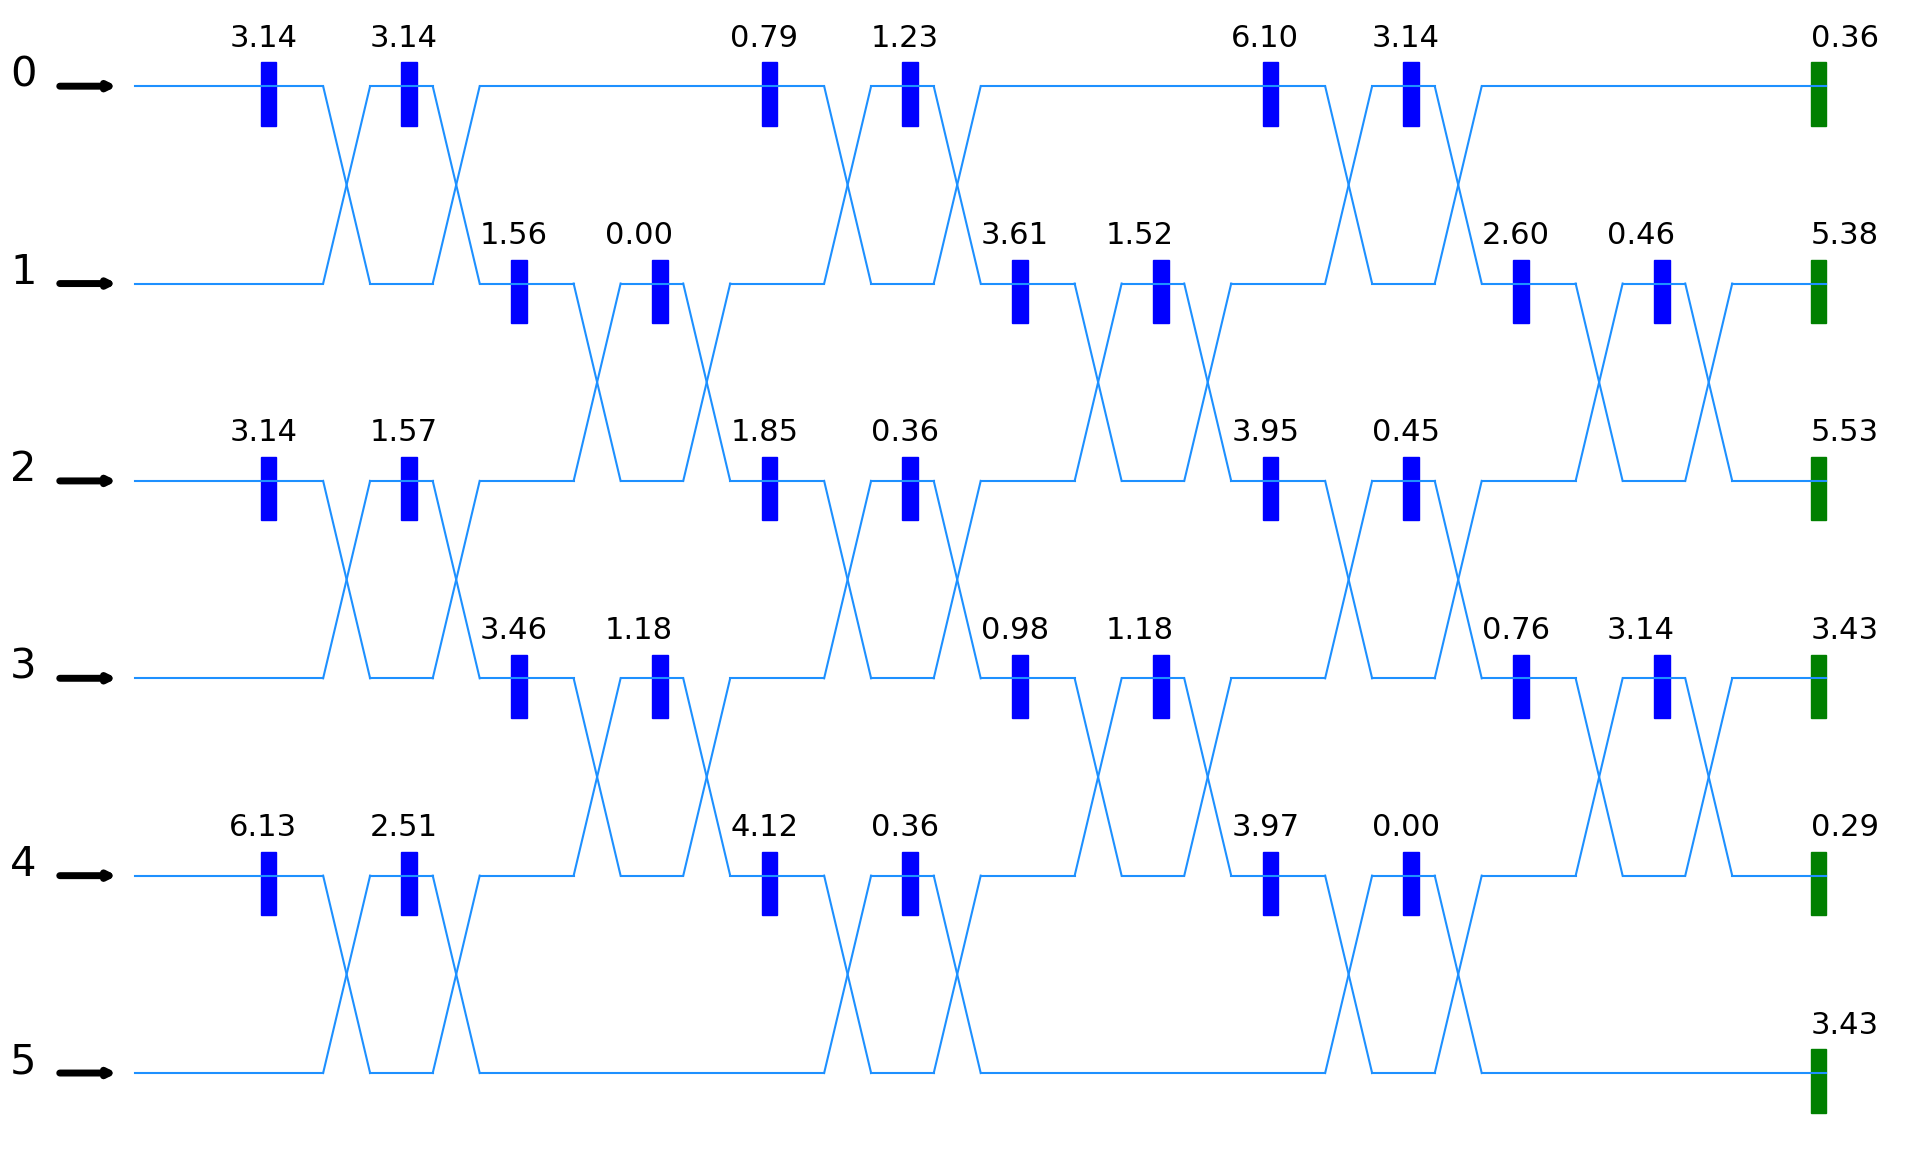

In [10]:
p_mzi = dq.photonic.draw.Graph_Mzi(6,mzi_info )
p_mzi.plotting_clements()

In [11]:
## check the result 
p_mzi.ps_position

{(0, 0): 3.1416,
 (0, 1): 3.1416,
 (0, 2): 0.7854,
 (0, 3): 1.231,
 (0, 4): 6.0972,
 (0, 5): 3.1416,
 (0, 6): 0.3559,
 (1, 0): 1.5642,
 (1, 1): 0.0,
 (1, 2): 3.6148,
 (1, 3): 1.5195,
 (1, 4): 2.6046,
 (1, 5): 0.457,
 (1, 6): 5.3768,
 (2, 0): 3.1416,
 (2, 1): 1.5708,
 (2, 2): 1.8511,
 (2, 3): 0.3627,
 (2, 4): 3.9527,
 (2, 5): 0.4455,
 (2, 6): 5.5287,
 (3, 0): 3.4574,
 (3, 1): 1.183,
 (3, 2): 0.9793,
 (3, 3): 1.183,
 (3, 4): 0.7566,
 (3, 5): 3.1416,
 (3, 6): 3.4298,
 (4, 0): 6.1314,
 (4, 1): 2.5061,
 (4, 2): 4.1209,
 (4, 3): 0.3627,
 (4, 4): 3.9691,
 (4, 5): 0.0,
 (4, 6): 0.2882,
 (5, 0): 3.4298}

## 8x8 case

In [12]:
u8x8 = np.eye(8,8)
mzi_info = dq.photonic.decompose.decomp(u8x8,"cssr")[0]

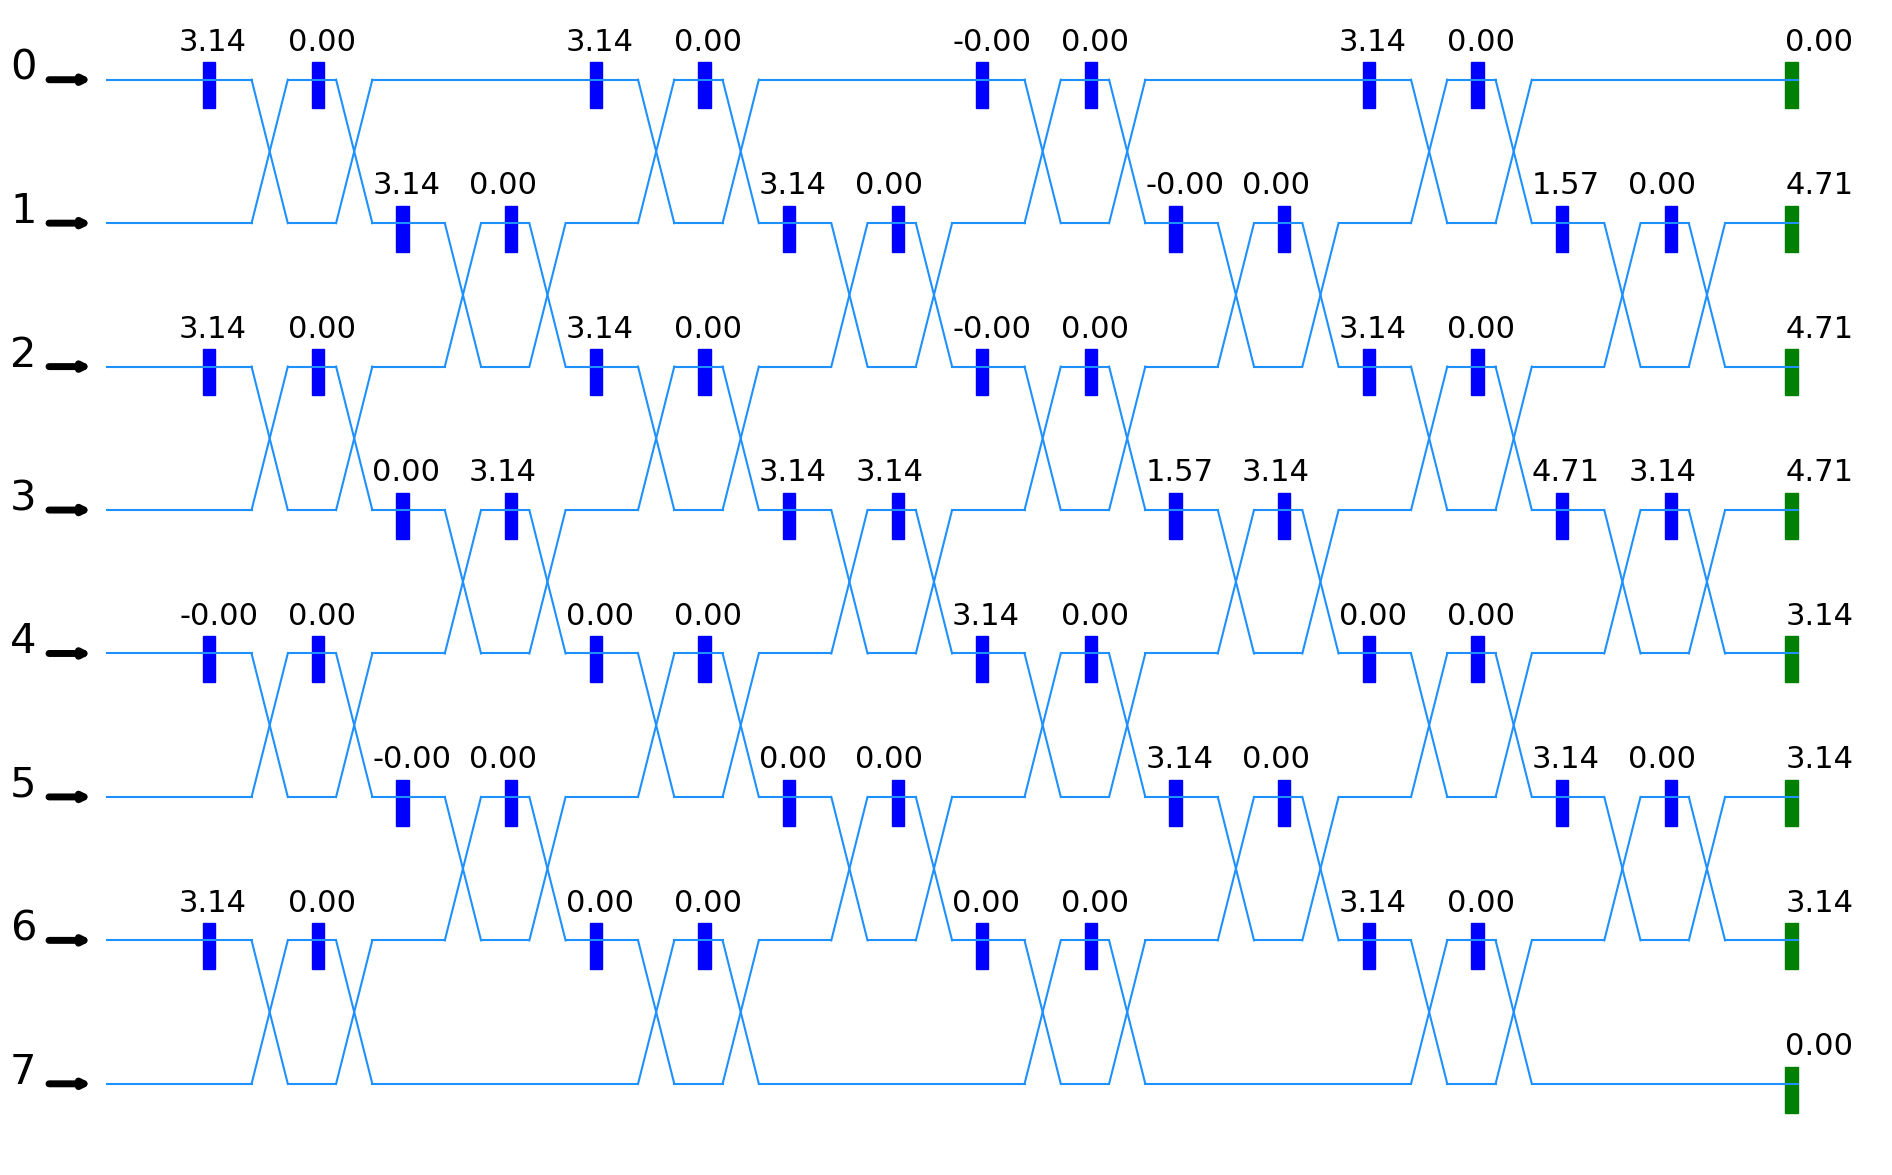

In [14]:
p_mzi = dq.photonic.draw.Graph_Mzi(8,mzi_info )
p_mzi.plotting_clements()

In [15]:
p_mzi.ps_position

{(0, 0): 3.1416,
 (0, 1): 0.0,
 (0, 2): 3.1416,
 (0, 3): 0.0,
 (0, 4): -0.0,
 (0, 5): 0.0,
 (0, 6): 3.1416,
 (0, 7): 0.0,
 (0, 8): 0.0,
 (1, 0): 3.1416,
 (1, 1): 0.0,
 (1, 2): 3.1416,
 (1, 3): 0.0,
 (1, 4): -0.0,
 (1, 5): 0.0,
 (1, 6): 1.5708,
 (1, 7): 0.0,
 (1, 8): 4.7124,
 (2, 0): 3.1416,
 (2, 1): 0.0,
 (2, 2): 3.1416,
 (2, 3): 0.0,
 (2, 4): -0.0,
 (2, 5): 0.0,
 (2, 6): 3.1416,
 (2, 7): 0.0,
 (2, 8): 4.7124,
 (3, 0): 0.0,
 (3, 1): 3.1416,
 (3, 2): 3.1416,
 (3, 3): 3.1416,
 (3, 4): 1.5708,
 (3, 5): 3.1416,
 (3, 6): 4.7124,
 (3, 7): 3.1416,
 (3, 8): 4.7124,
 (4, 0): -0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.0,
 (4, 4): 3.1416,
 (4, 5): 0.0,
 (4, 6): 0.0,
 (4, 7): 0.0,
 (4, 8): 3.1416,
 (5, 0): -0.0,
 (5, 1): 0.0,
 (5, 2): 0.0,
 (5, 3): 0.0,
 (5, 4): 3.1416,
 (5, 5): 0.0,
 (5, 6): 3.1416,
 (5, 7): 0.0,
 (5, 8): 3.1416,
 (6, 0): 3.1416,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (6, 4): 0.0,
 (6, 5): 0.0,
 (6, 6): 3.1416,
 (6, 7): 0.0,
 (6, 8): 3.1416,
 (7, 0): 0.0}